In [22]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [ ]:
#langchain对提示的封装-提示模板（prompt templates）
from langchain import PromptTemplate

no_input_prompt = PromptTemplate(input_variables=[], template="给我讲个故事")
no_input_prompt.format()

In [ ]:
one_input_prompt = PromptTemplate(input_variables=["什么样子"], template="给我讲个{什么样子}的故事")
one_input_prompt.format(什么样子="武侠")

In [ ]:
multiple_input_prompt = PromptTemplate(
    input_variables = ["什么样子", "啥"],
    template="给我讲一个关于{啥}的{什么样子}的故事"
)
multiple_input_prompt.format(什么样子="科幻", 啥="太空")

In [ ]:
template = "给我讲一个关于{啥}的{什么样子}的故事"
prompt_template = PromptTemplate.from_template(template)

prompt_template.input_variables

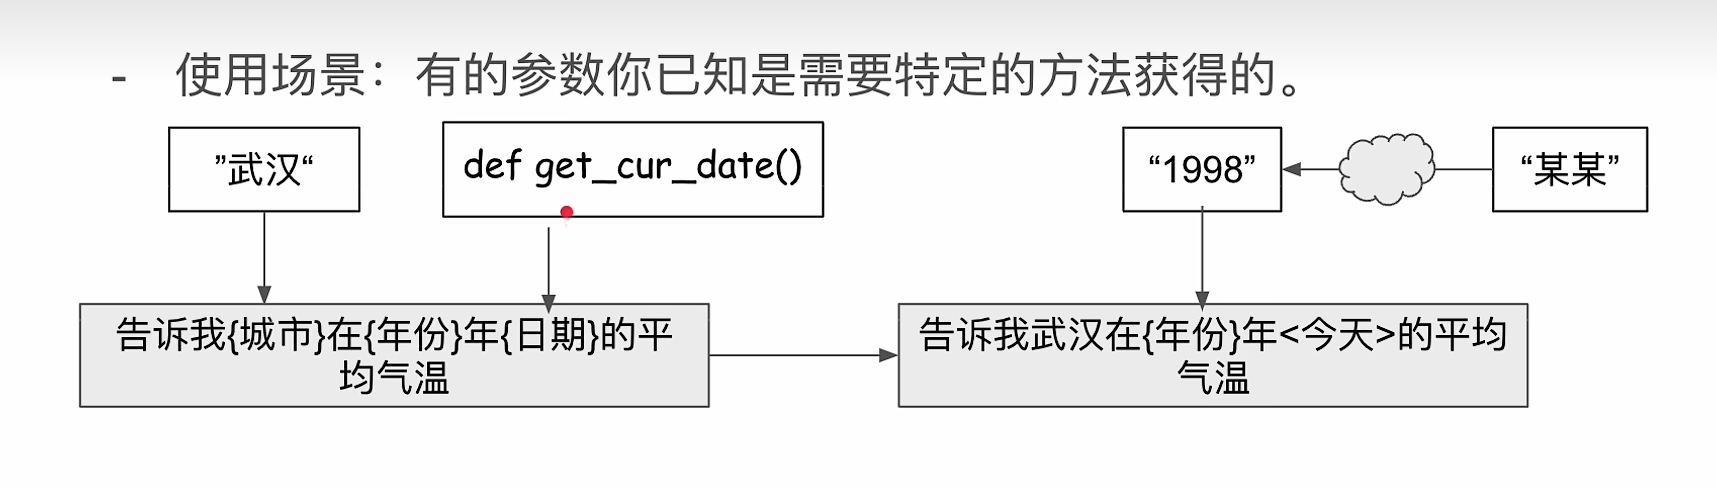

In [ ]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate(template="告诉我{城市}在{年份}年{日期}的平均气温", input_variables=["城市","年份","日期"])
partial_prompt = prompt.partial(城市="武汉")
print(partial_prompt.format(年份="1998", 日期="12月24日"))

In [ ]:
from datetime import datetime

def _get_datetime():
    now = datetime.now()
    return now.strftime("%Y年%m月%d日")
prompt = PromptTemplate(template="告诉我{城市}在{年份}年{日期}的平均气温", input_variables=["城市","年份","日期"])
partial_prompt = prompt.partial(城市="武汉", 日期=_get_datetime)
print(partial_prompt.format(年份="1998"))


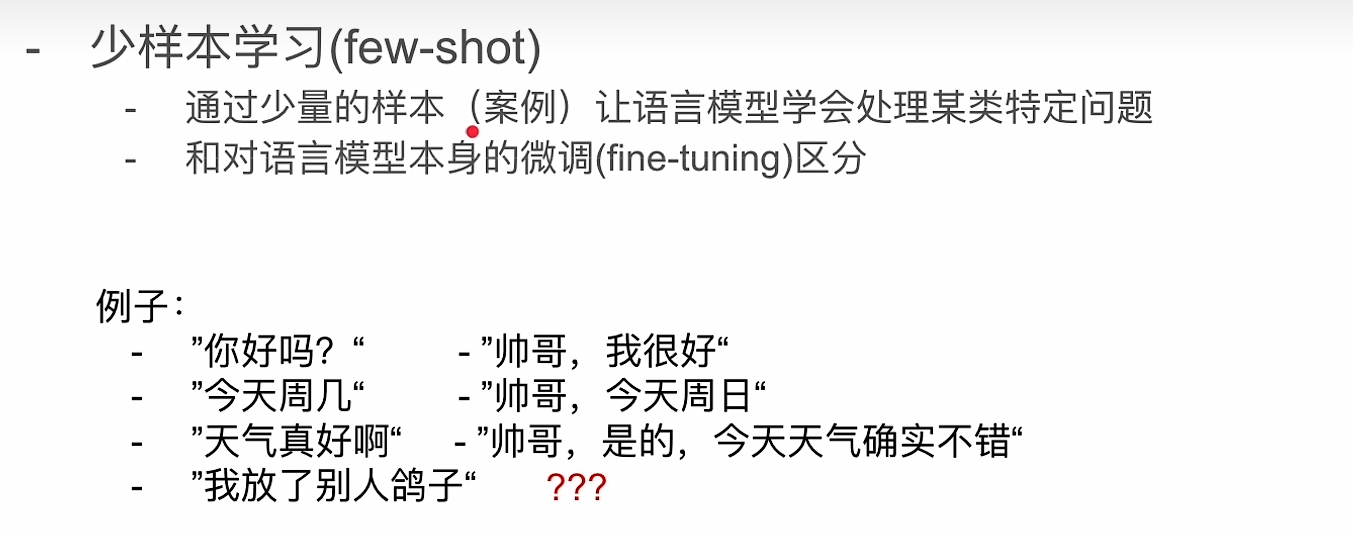

少样本学习是指讲少量是示例喂给大模型，让大模型产生一种回复的惯性思维。而微调是直接影响模型本身，用大量的数据调整模型本身的参数。
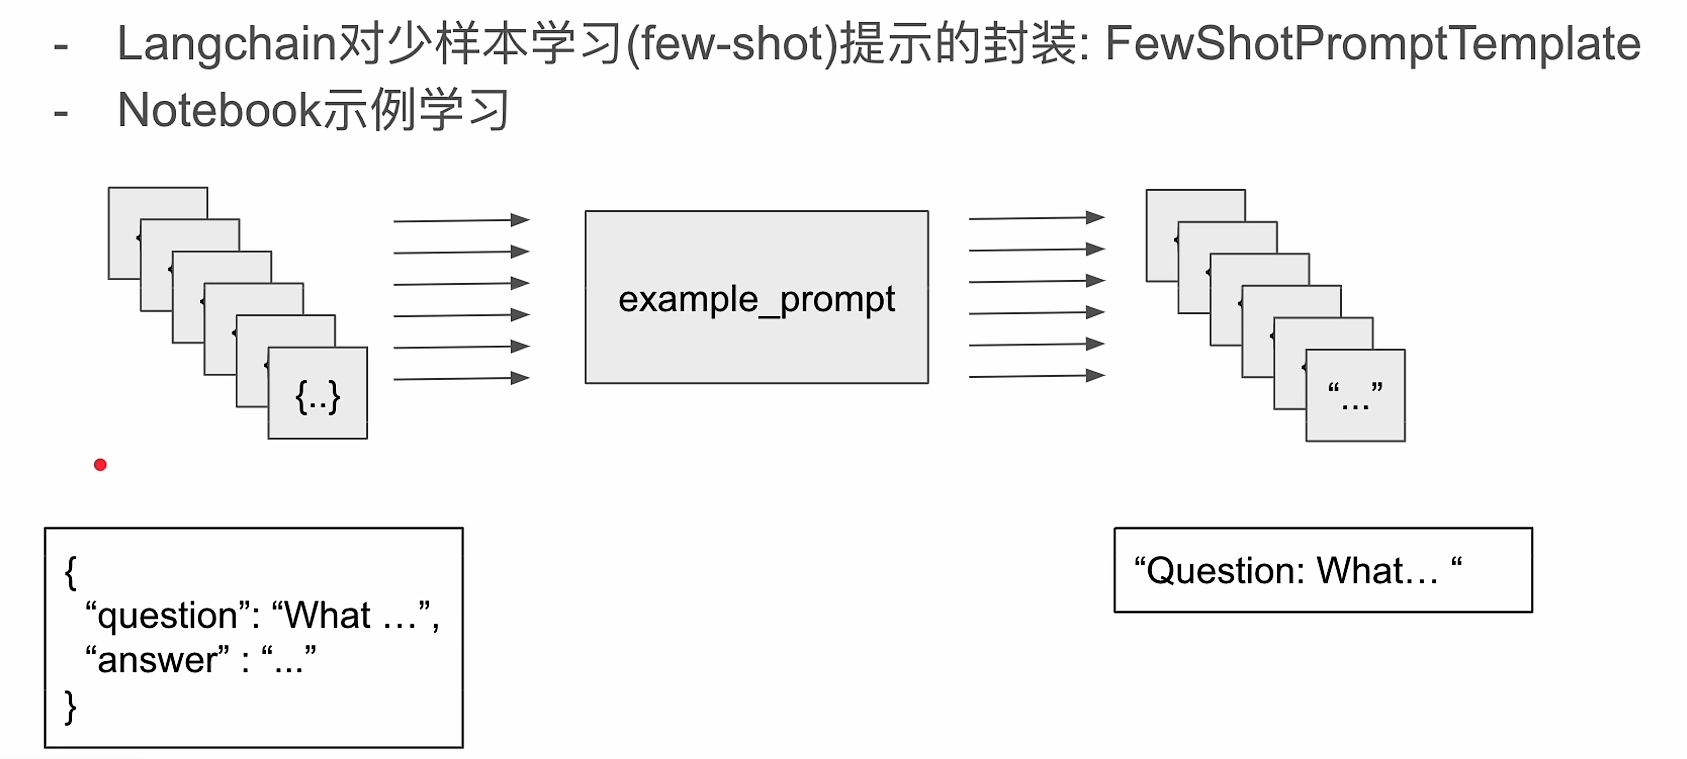

In [30]:
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain_openai import ChatOpenAI
from langchain.prompts.prompt import PromptTemplate
from langchain.chains import ConversationChain
import os

examples = [
    {
        "question": "你好",
        "answer": "小助手有什么可以帮助您的吗？"
    },
    {
        "question": "我鼠标丢了能不能领个新的吗？", 
        "answer": "可以的，您可以oa上提交一下流程，然后到您所在site的it那边领取"},
    {
       "question": "张润一号楼IT联系哪位",
        "answer": "您可以联系潘浩或者戚晔"
    },
]

example_prompt = PromptTemplate(input_variables=["question","answer"], template = "Qusetion: {question}\n{answer}")
prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"]
)

print(prompt.format(input="请问还有什么需要帮助的吗？"))

api_key = os.getenv('OPENAI_API_KEY')
base_url = os.getenv('OPENAI_BASE_URL')
model = os.getenv('OPENAI_MODEL')

llm = ChatOpenAI(
    api_key=api_key,
    base_url=base_url,
    model=model
)
conversation = ConversationChain(llm=llm, verbose=True)
conversation.run("你好")


Qusetion: 你好
Answer: 小助手有什么可以帮助您的吗？

Qusetion: 我鼠标丢了能不能领个新的吗？
Answer: 可以的，您可以oa上提交一下流程，然后到您所在site的it那边领取

Qusetion: 张润一号楼IT联系哪位
Answer: 您可以联系潘浩或者戚晔

Qusetion: 请问还有什么需要帮助的吗？
Answer:
您好！有什么我可以帮助您的吗？
